<a href="https://colab.research.google.com/github/CharlesPoletowin/YCBS-273/blob/master/Lecture4_conv_pool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

# Convolution

## 1-d convolution

The mathematical definition of convolution of two 1-dimensional signals is given by

$$
(i * f)(T) = \sum_{t=0}^{T}i(t)f(T-t)
$$

Let $i$ be the input signal and $f$ be called the filter. If we had to overly simplify, given an appropriate filter the result of the convolution indicates the changes in input signal.

In [0]:
i = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')
f = np.array([-1,1], dtype='float32')
c = np.convolve(i, f)

The spikes in result of the convolution, $c$, indicates the change in the input signal, $i$.

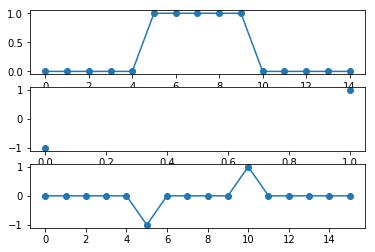

In [0]:
plt.subplot(311)
plt.plot(i, 'o-')

plt.subplot(312)
plt.plot(f, 'o')

plt.subplot(313)
plt.plot(c, 'o-')

## 2-d convolution

While the mathematical equation for 2-d convolution is slightly more complicated, it is similar to 1-d convolution in spirit. The result of the convulution of a filter with an input signal indicates changes in the same. The most popular 2-d signal is an image. A stark in the pixel values of an image indiacte an edge. Below example of filteres which approximately detect horizontal/vertical edges.

Image shape:  (512, 512)


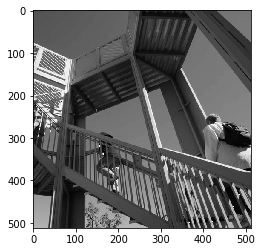

In [0]:
img = misc.ascent()
print('Image shape: ', img.shape)
plt.imshow(img, cmap='gray')

### Horizontal edge filter

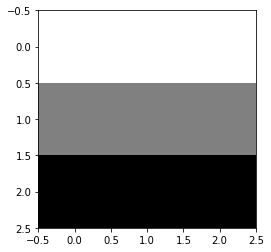

In [0]:
# horizontal lines where top is white and bottom is black
h_filter = np.array([[ 2,  2,  2],
                     [ 0,  0,  0],
                     [-2, -2, -2]])
plt.imshow(h_filter, cmap='gray')

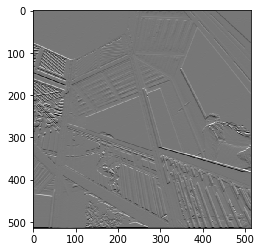

In [0]:
res = convolve2d(img, h_filter)

# enhanced some parts and suppressed other parts
plt.imshow(res, cmap='gray')

### Vertical edge filter

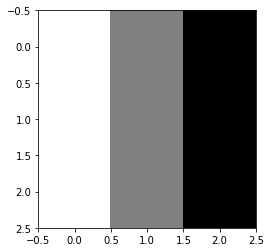

In [0]:
# vertical lines where top is white and bottom is black
v_filter = np.array([[ 2,  0,  -2],
                     [ 2,  0,  -2],
                     [2, 0, -2]])
plt.imshow(v_filter, cmap='gray')

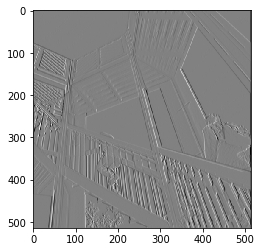

In [0]:
res = convolve2d(img, v_filter)

# enhanced some parts and suppressed other parts
plt.imshow(res, cmap='gray')

## Convolutional layer in PyTorch

In [0]:
import torch
from torch import nn

class ConvLayer(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), stride=1, padding=0)

  def forward(self, xb):
    return self.conv1(xb)

conv_layer = ConvLayer()

In [0]:
conv_layer.conv1.weight

Parameter containing:
tensor([[[[ 0.2216, -0.0603, -0.0564],
          [-0.2540,  0.1972, -0.0310],
          [ 0.2058,  0.1548, -0.2139]]]], requires_grad=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


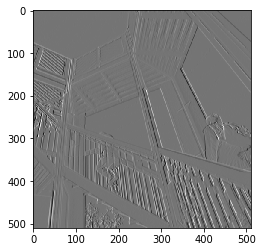

In [0]:
img = torch.tensor(img).view(1, 1, 512, 512)
conv_layer.conv1.weight = nn.Parameter(torch.FloatTensor([[[[ 2,  0,  -2],
                                             [ 2,  0,  -2],
                                             [2, 0, -2]]]]))

out = conv_layer(img.float())
plt.imshow(out.view(510, 510).detach().numpy(), cmap='gray')

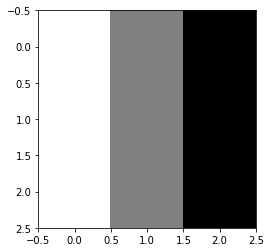

In [0]:
plt.imshow(conv_layer.conv1.weight.view(3, 3).detach().numpy(), cmap='gray')

# Pooling

Pooling is useful to induce spacial invariance in our model. It also helps to reduce the parameters of our model by reducing the dimension of input.

## Pooling layers in PyTorch

### Max pooling

In [0]:
import torch
from torch import nn

class MaxPoolLayer(nn.Module):
  def __init__(self):
    super().__init__()
    self.pool1 = nn.MaxPool2d(kernel_size=(4, 4), padding=0)

  def forward(self, xb):
    return self.pool1(xb)

max_pool_layer = MaxPoolLayer()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


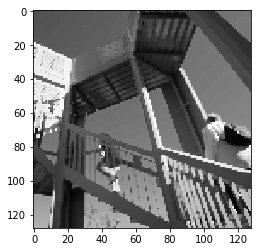

In [0]:
img = torch.tensor(img).view(1, 1, 512, 512)

out = max_pool_layer(img.float())
plt.imshow(out.view(128, 128).detach().numpy(), cmap='gray')

### Average pooling

In [0]:
import torch
from torch import nn

class AvgPoolLayer(nn.Module):
  def __init__(self):
    super().__init__()
    self.pool1 = nn.AvgPool2d(kernel_size=(4, 4), padding=0)

  def forward(self, xb):
    return self.pool1(xb)

avg_pool_layer = AvgPoolLayer()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


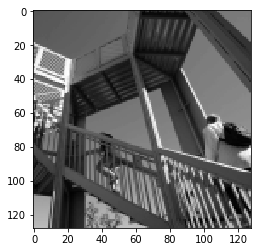

In [0]:
img = torch.tensor(img).view(1, 1, 512, 512)

out = avg_pool_layer(img.float())
plt.imshow(out.view(128, 128).detach().numpy(), cmap='gray')